In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from warnings import filterwarnings
filterwarnings("ignore")


### Problem Statement:

#### You work for an office transport company. You are in discussions with ABC Consulting company for providing transport for their employees. For this purpose,you are tasked with understanding how do the employees of ABC Consulting prefer to commute presently (between home and office). Based on the parameters like age, salary, work experience etc. given in the data set ‘Transport.csv’,you are required to predict the preferred mode of transport. The project requires you to build several Machine Learning models and compare them so that the model can be finalised.



#### 1.1) Read the dataset. Do the descriptive statistics and do null value condition check.


In [2]:
# Loading the Dataset

data = pd.read_csv("Transport.csv")

In [3]:
# Frist 5 rows of Dataset

data.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [4]:
# Last 5 rows of Dataset

data.tail()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
439,40,Male,1,0,20,57.0,21.4,1,Private Transport
440,38,Male,1,0,19,44.0,21.5,1,Private Transport
441,37,Male,1,0,19,45.0,21.5,1,Private Transport
442,37,Male,0,0,19,47.0,22.8,1,Private Transport
443,39,Male,1,1,21,50.0,23.4,1,Private Transport


In [5]:
# Summary of Dataset

data.describe(include="all")

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
count,444.000000,444,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,Public Transport
freq,NaN,316,NaN,NaN,NaN,NaN,NaN,NaN,300
mean,27.747748,NaN,0.754505,0.252252,6.299550,16.238739,11.323198,0.234234,NaN
std,4.416710,NaN,0.430866,0.434795,5.112098,10.453851,3.606149,0.423997,NaN
min,18.000000,NaN,0.000000,0.000000,0.000000,6.500000,3.200000,0.000000,NaN
25%,25.000000,NaN,1.000000,0.000000,3.000000,9.800000,8.800000,0.000000,NaN
50%,27.000000,NaN,1.000000,0.000000,5.000000,13.600000,11.000000,0.000000,NaN
75%,30.000000,NaN,1.000000,1.000000,8.000000,15.725000,13.425000,0.000000,NaN


In [6]:
# Check for missing value in any column

data.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

In [7]:
# Checks missing values in Dataset.

data.isnull().sum().any()

False

#### Measures of central tendency such as mean, median, and mode can provide insights into the typical value or behavior of the dataset. For example, if the mean is higher than the median, the distribution of the data might be skewed towards higher values.


####  The data is complete and there are no missing values that need to be imputed or removed before analysis.

#### The absence of missing values can make it easier to analyze the data and build machine learning models with higher accuracy.

#### The absence of missing values can also reduce the risk of bias in statistical analyses and ensure that the results are more reliable.

#### However, it is still important to check other aspects of the data such as outliers, inconsistent values, and data types, as these factors can also affect the accuracy of the analysis or model.



In [8]:
# Info of Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [9]:
# Converting float variables to int64

float_cols =['Salary', 'Distance']
for col in float_cols:
    data[col] = data[col].astype('int64')


In [10]:
# Info of Datadaset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        444 non-null    int64 
 1   Gender     444 non-null    object
 2   Engineer   444 non-null    int64 
 3   MBA        444 non-null    int64 
 4   Work Exp   444 non-null    int64 
 5   Salary     444 non-null    int64 
 6   Distance   444 non-null    int64 
 7   license    444 non-null    int64 
 8   Transport  444 non-null    object
dtypes: int64(7), object(2)
memory usage: 31.3+ KB


**Making different list for categorical columns and numerical columns**


In [11]:
cat=[]
num=[]
for i in data.columns:
    if data[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['Gender', 'Transport']
['Age', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance', 'license']


The above output shows that there is no “null” value in our dataset. (“?” or ” ”) these two symbols are most commonly detected. 

Let’s try to test whether any categorical attribute contains a “?” in it or not. At times there exists “?” or ” ” in place of missing values. Using the below code snippet we are going to test whether adult_df data frame consists of categorical variables 
with values as “?”.

In [12]:
for variable in cat:
    print(variable,":", sum(data[variable] == '?'))

Gender : 0
Transport : 0


The output of the above code snippet shows that there are no "?" or " " present in the data set

## Data preprocessing


we need some summary statistics of our dataframe. For this, we can use describe() 
method. It can be used to generate various summary statistics.

#### Describe for numerical and categorical columns


In [13]:
data[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,444.0,27.747748,4.416710,18.0,25.0,27.0,30.0,43.0
Engineer,444.0,0.754505,0.430866,0.0,1.0,1.0,1.0,1.0
MBA,444.0,0.252252,0.434795,0.0,0.0,0.0,1.0,1.0
Work Exp,444.0,6.299550,5.112098,0.0,3.0,5.0,8.0,24.0
Salary,444.0,15.617117,10.594614,6.0,9.0,13.0,15.0,57.0
Distance,444.0,10.903153,3.594213,3.0,8.0,11.0,13.0,23.0
license,444.0,0.234234,0.423997,0.0,0.0,0.0,0.0,1.0


In [14]:
data[cat].describe().T

,count,unique,top,freq
Gender,444,2,Male,316
Transport,444,2,Public Transport,300


**To check for duplicate data in Dataset**

In [15]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data[dups]

Number of duplicate rows = 15


,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
13,27,Male,1,0,4,13,5,1,Public Transport
30,26,Female,0,0,3,9,6,0,Public Transport
34,30,Female,1,0,8,14,6,0,Public Transport
100,30,Female,1,0,8,14,8,0,Public Transport
102,24,Male,1,0,2,8,8,0,Public Transport
117,21,Female,1,0,3,9,8,0,Public Transport
156,24,Male,1,1,0,7,9,0,Public Transport
158,26,Male,1,0,2,9,9,0,Public Transport
162,25,Male,1,0,1,8,9,0,Public Transport
189,24,Male,1,0,0,7,10,0,Public Transport


In [16]:
# Check Datatypes

data.duplicated().sum()

15

Duplicated values are present in Dataset:
There are Total 15 number of duplicate rows in Dataset.

Number of duplicate rows = 15


In [17]:
# To drop duplicated values from Dataset.

data.drop_duplicates(inplace=True) 


In [18]:
# Are there any duplicates ?

dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data[dups]


Number of duplicate rows = 0


,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport


In [19]:
# To check and sum of duplicated values

dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(data.shape)


Number of duplicate rows = 0
(429, 9)


Droping all duplicated row values from Dataset:


#### Check the data types of all the variables and get the unique counts of all the 'Object' type variables.¶


In [20]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print(feature)
        print(data[feature].value_counts())
        print('\n')


Gender
Male      306
Female    123
Name: Gender, dtype: int64


Transport
Public Transport     286
Private Transport    143
Name: Transport, dtype: int64




#### 1.2 Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (5 pts). Interpret the inferences for each (3 pts)


In [21]:
# Check for missing value in any column

data.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

There are no null values present in Dataset.

In [22]:
# Check Datatypes

data.dtypes

Age           int64
Gender       object
Engineer      int64
MBA           int64
Work Exp      int64
Salary        int64
Distance      int64
license       int64
Transport    object
dtype: object

In [23]:
# Shape of dataset

data.shape

(429, 9)

In [24]:
# Get unique counts of all Nominal Variables

for column in data[['Age','Gender', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance', 
                    'license', 'Transport']]:
    print(column.upper(),': ',data[column].nunique())
    print(data[column].value_counts().sort_values())
    print('\n')


AGE :  25
43     1
19     1
42     1
18     2
35     2
37     4
20     5
36     6
40     7
39     7
21     7
38     9
34    11
33    11
32    13
22    15
31    16
23    24
29    25
30    31
25    36
24    43
28    45
27    48
26    59
Name: Age, dtype: int64


GENDER :  2
Female    123
Male      306
Name: Gender, dtype: int64


ENGINEER :  2
0    107
1    322
Name: Engineer, dtype: int64


MBA :  2
1    109
0    320
Name: MBA, dtype: int64


WORK EXP :  24
24     1
17     2
15     2
22     3
13     3
18     5
12     5
16     5
20     6
21     6
14     8
19    10
11    11
10    14
9     21
1     21
8     25
0     27
7     28
5     41
3     44
6     45
2     45
4     51
Name: Work Exp, dtype: int64


SALARY :  45
50     1
29     1
25     1
19     1
40     1
24     1
46     1
35     1
55     1
52     1
30     1
57     1
22     2
47     2
54     2
37     2
39     2
33     2
48     2
43     2
41     2
21     3
38     3
42     3
51     3
44     3
18     4
28     5
36     5
45     5
34     5


In [25]:
# Summary of Dataset

data.describe()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,27.794872,0.750583,0.254079,6.384615,15.780886,10.972028,0.240093
std,4.460614,0.433181,0.435851,5.156780,10.729404,3.615150,0.427639
min,18.000000,0.000000,0.000000,0.000000,6.000000,3.000000,0.000000
25%,25.000000,1.000000,0.000000,3.000000,9.000000,8.000000,0.000000
50%,27.000000,1.000000,0.000000,5.000000,13.000000,11.000000,0.000000
75%,30.000000,1.000000,1.000000,8.000000,15.000000,13.000000,0.000000
max,43.000000,1.000000,1.000000,24.000000,57.000000,23.000000,1.000000


Summary of Dataset with, count, mean, std, min, 25%, 50%, 75% and max has been mentioned.

In [26]:
### unique values for categorical variables

In [27]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

GENDER :  2
Female    123
Male      306
Name: Gender, dtype: int64


TRANSPORT :  2
Private Transport    143
Public Transport     286
Name: Transport, dtype: int64




**Univariate Analysis**

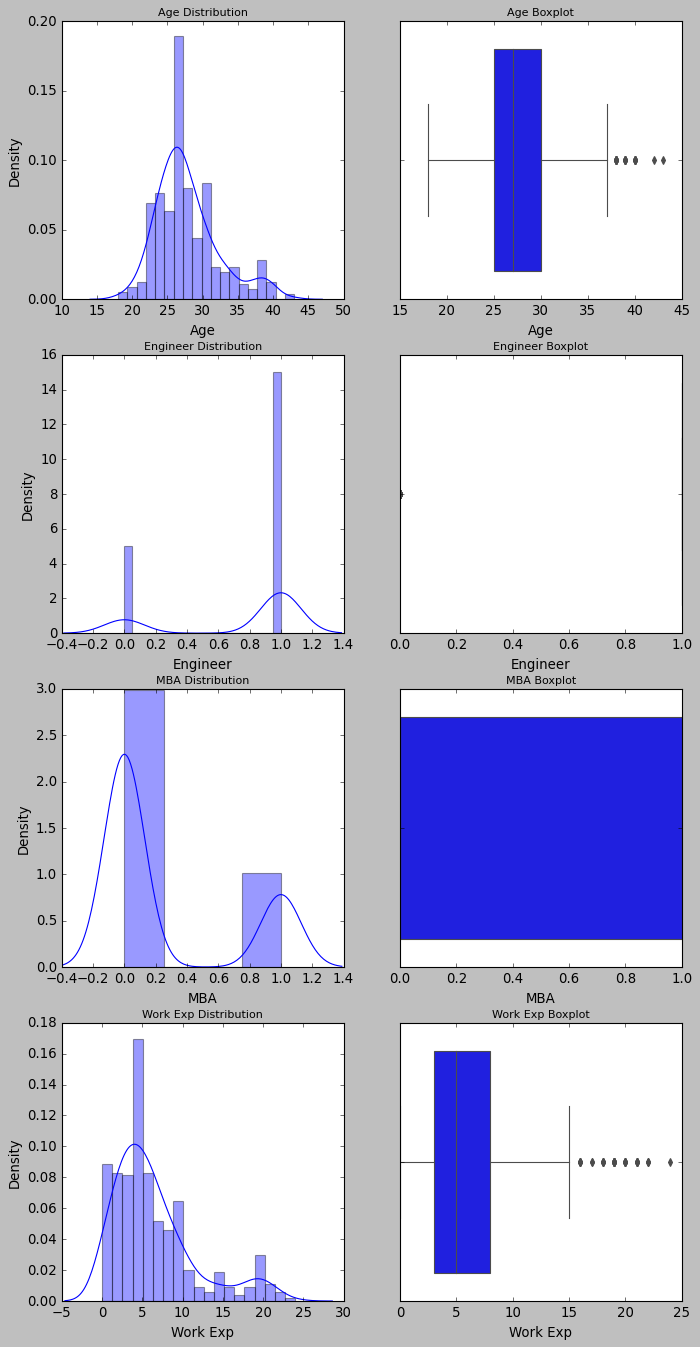

In [28]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(data['Age'] , ax=axes[0][0])
a.set_title("Age Distribution",fontsize=10)

a = sns.boxplot(data['Age'] , orient = "v" , ax=axes[0][1])
a.set_title("Age Boxplot",fontsize=10)

a = sns.distplot(data['Engineer'] , ax=axes[1][0])
a.set_title("Engineer Distribution",fontsize=10)

a = sns.boxplot(data['Engineer'] , orient = "v" , ax=axes[1][1])
a.set_title("Engineer Boxplot",fontsize=10)


a = sns.distplot(data['MBA'] , ax=axes[2][0])
a.set_title("MBA Distribution",fontsize=10)

a = sns.boxplot(data['MBA'] , orient = "v" , ax=axes[2][1])
a.set_title("MBA Boxplot",fontsize=10)


a = sns.distplot(data['Work Exp'] , ax=axes[3][0])
a.set_title("Work Exp Distribution",fontsize=10)

a = sns.boxplot(data['Work Exp'] , orient = "v" , ax=axes[3][1])
a.set_title("Work Exp Boxplot",fontsize=10)

plt.show()

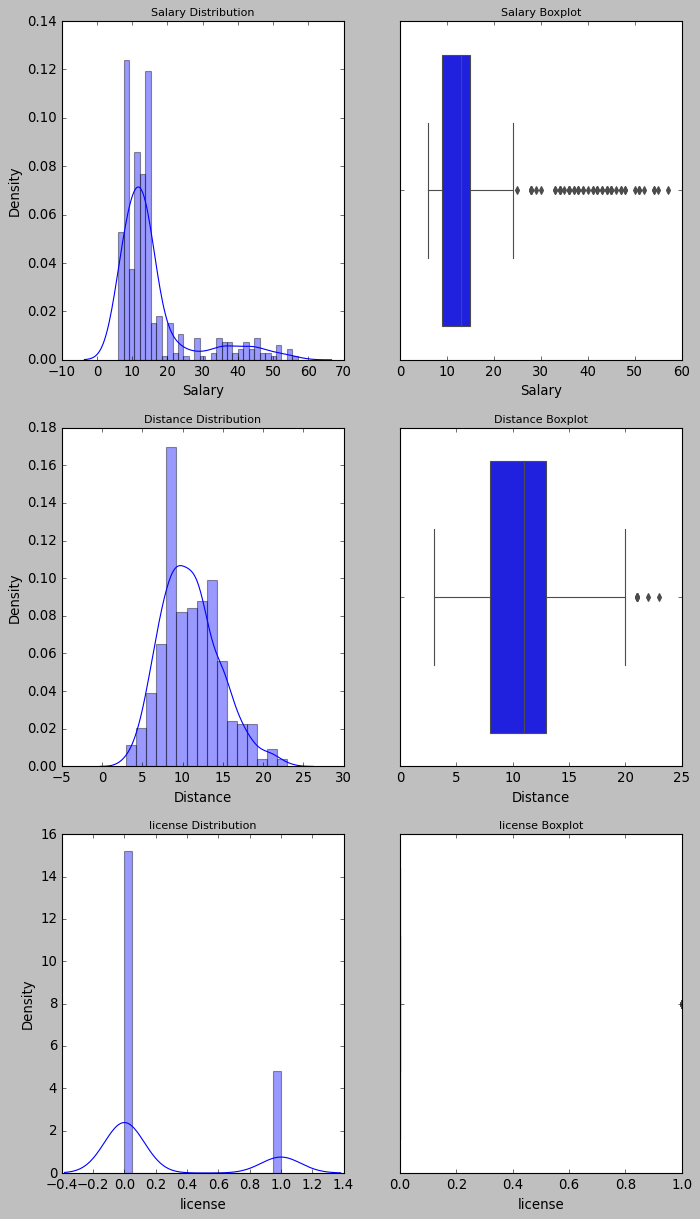

In [29]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(data['Salary'] , ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=10)

a = sns.boxplot(data['Salary'] , orient = "v" , ax=axes[0][1])
a.set_title("Salary Boxplot",fontsize=10)

a = sns.distplot(data['Distance'] , ax=axes[1][0])
a.set_title("Distance Distribution",fontsize=10)

a = sns.boxplot(data['Distance'] , orient = "v" , ax=axes[1][1])
a.set_title("Distance Boxplot",fontsize=10)

a = sns.distplot(data['license'] , ax=axes[2][0])
a.set_title("license Distribution",fontsize=10)

a = sns.boxplot(data['license'] , orient = "v" , ax=axes[2][1])
a.set_title("license Boxplot",fontsize=10)
plt.show()

In [30]:
data.columns

Index(['Age', 'Gender', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance',
       'license', 'Transport'],
      dtype='object')

###  Bivariate and Multivariate Analysis

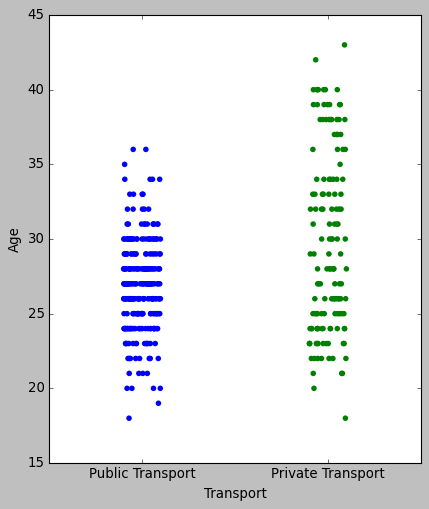

In [31]:
plt.figure(figsize=(6,7))
sns.stripplot(data["Transport"], data['Age'], jitter=True) 
plt.show()

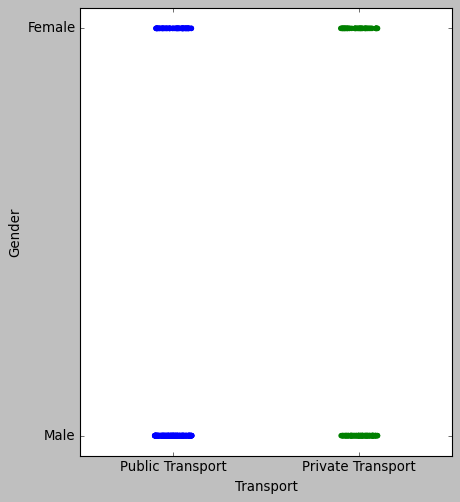

In [32]:
plt.figure(figsize=(6,7))
sns.stripplot(data["Transport"], data['Gender'], jitter=True) 
plt.show()

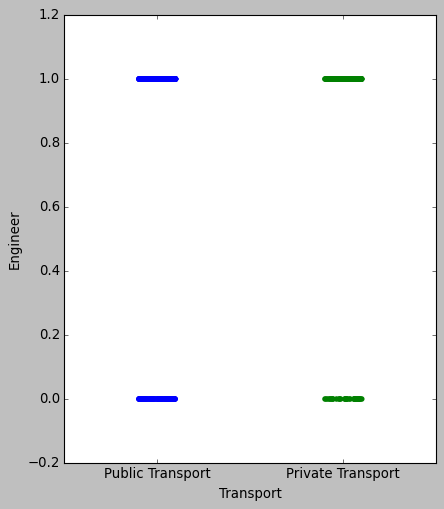

In [33]:
plt.figure(figsize=(6,7))
sns.stripplot(data["Transport"], data['Engineer'], jitter=True) 
plt.show()

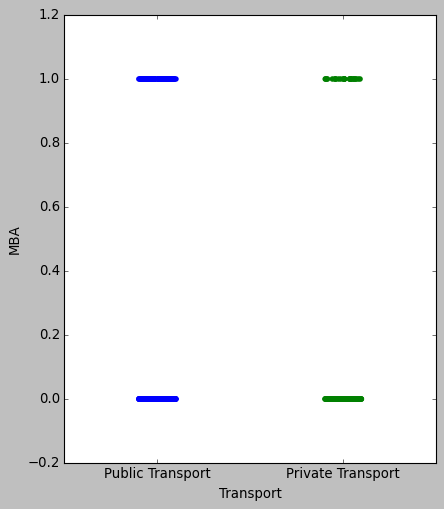

In [34]:
plt.figure(figsize=(6,7))
sns.stripplot(data["Transport"], data['MBA'], jitter=True) 
plt.show()

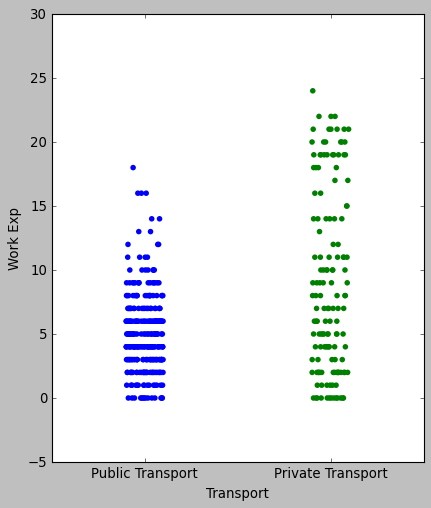

In [35]:
plt.figure(figsize=(6,7))
sns.stripplot(data["Transport"], data['Work Exp'], jitter=True) 
plt.show()

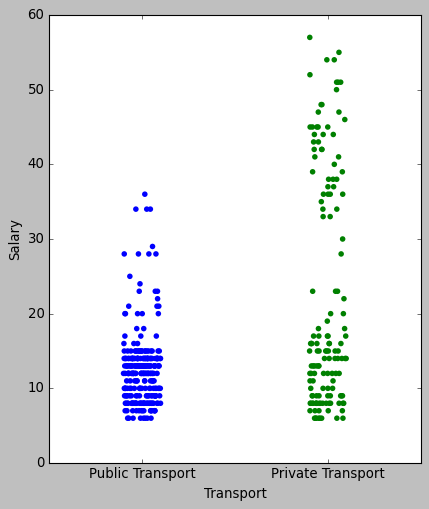

In [36]:
plt.figure(figsize=(6,7))
sns.stripplot(data["Transport"], data['Salary'], jitter=True) 
plt.show()

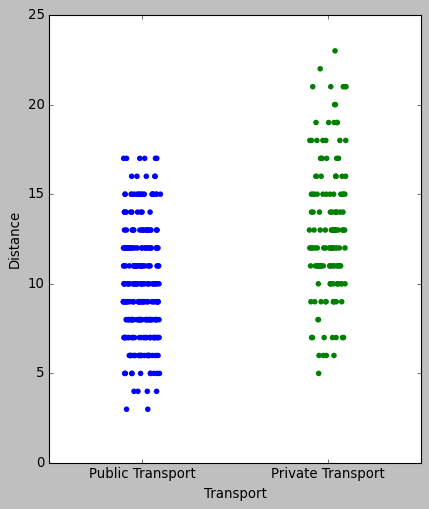

In [37]:
plt.figure(figsize=(6,7))
sns.stripplot(data["Transport"], data['Distance'], jitter=True) 
plt.show()

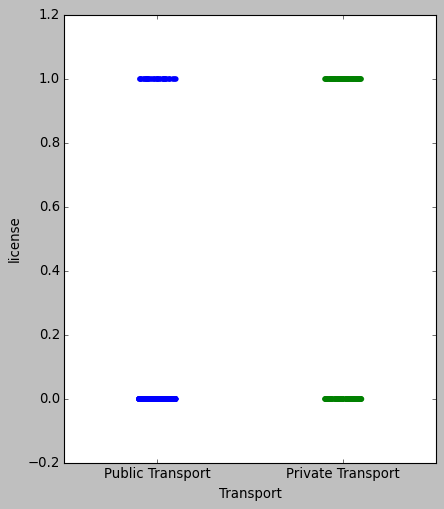

In [38]:
plt.figure(figsize=(6,7))
sns.stripplot(data["Transport"], data['license'], jitter=True) 
plt.show()

In [39]:
# calculate a 5-number summary

from numpy import percentile
from numpy.random import rand

# generate data sample
sample = rand(1000)

# calculate quartiles
quartiles = percentile(sample, [25, 50, 75])

# calculate min/max
sample_min, sample_max = sample.min(), sample.max()

# print 5-number summary
print('Min: %.3f' % sample_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % sample_max)

Min: 0.001
Q1: 0.248
Median: 0.519
Q3: 0.753
Max: 0.998


#### Plotting boxplot to check outliers

In [40]:
from pylab import rcParams
rcParams['figure.figsize'] = 5,5


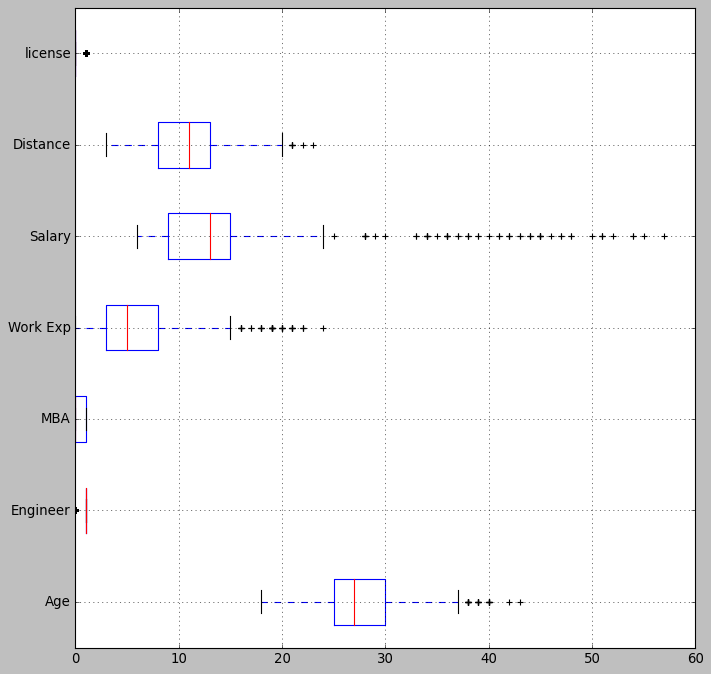

In [41]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
data[num].boxplot(vert=0)
plt.show()

**There are outliers present in most of the numerical columns. In Gaussian Naive Bayes, outliers will affect the shape of the Gaussian distribution and have the usual effects on the mean etc. So depending on our use case, it makes sense to remove outlier .**
** There are outliers in all the variables. Ensemble techniques can handle the outliers .** 

### outlier treatment
#### Treating the outliers at 1.5 * IQR (Inter-Quartile Range).


In [42]:
# # Defining a function for getting the Upper and Lower limt acceptance of the outliers at 1.5*IQR. 
# # We can choose to treat the outliers at 3*IQR as well

def remove_outlier(col):
     sorted(col)
     Q1,Q3=np.percentile(col,[25,75])
     IQR=Q3-Q1
     lower_range= Q1-(1.5 * IQR)
     upper_range= Q3+(1.5 * IQR)
     return lower_range, upper_range


In [43]:
## This is a loop to treat outliers for all the non-'object' type varible

for column in data.columns:
     if data[column].dtype != 'object': 
         lr,ur=remove_outlier(data[column])
         data[column]=np.where(data[column]>ur,ur,data[column])
         data[column]=np.where(data[column]<lr,lr,data[column])
        

<AxesSubplot:>

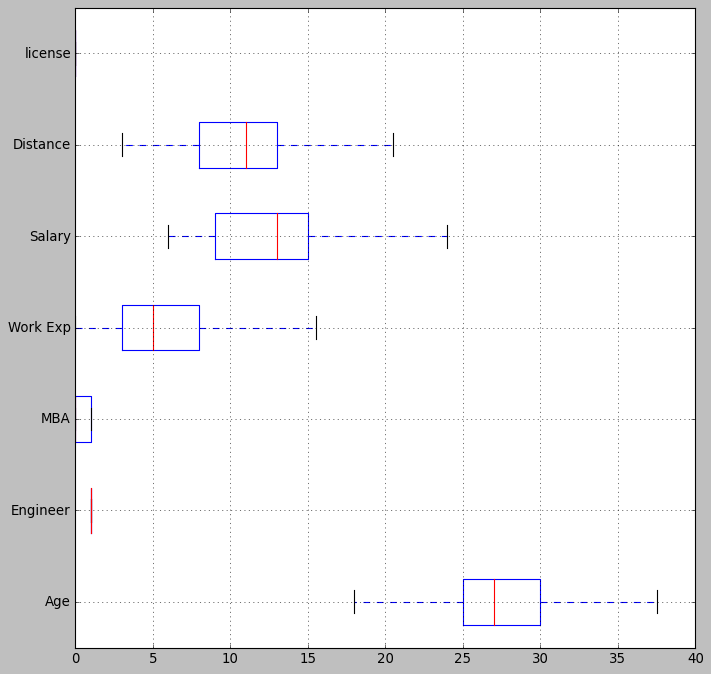

In [44]:
# Removing outliers by treating them.

plt.figure(figsize=(10,10))
data[num].boxplot(vert=0)


On treating Outliers and Removing them from Dataset.

Overall, outlier treatment is an important step in data preprocessing and can have a significant impact on the accuracy and interpretability of statistical analysis and machine learning models.





In [45]:
# Dropping the variables as the majority of the values are zero.

data.drop(labels=['Engineer', 'license'],axis=1,inplace=True)
data.head()


,Age,Gender,MBA,Work Exp,Salary,Distance,Transport
0,28.0,Male,0.0,4.0,14.0,3.0,Public Transport
1,23.0,Female,0.0,4.0,8.0,3.0,Public Transport
2,29.0,Male,0.0,7.0,13.0,4.0,Public Transport
3,28.0,Female,1.0,5.0,13.0,4.0,Public Transport
4,27.0,Male,0.0,4.0,13.0,4.0,Public Transport


Majority of variables in 'Engineer', 'license' are zero, therefore, they are droped.

The reason for dropping the "Engineer" and "license" columns is that they appear to have mostly zero values, which could indicate that they are not informative for the analysis.

Dropping variables with mostly zero values could reduce the dimensionality of the data and simplify the analysis.


In [46]:
# percentage of outliers present in the dabtaset

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()/data.shape[0]*100).round(2),columns=['Outliers %'])

,Outliers %
Age,0.0
Distance,0.0
Gender,0.0
MBA,0.0
Salary,0.0
Transport,0.0
Work Exp,0.0


In [47]:
## Let's rename columns to remove space before we impute

data.rename(columns = {"Work Exp": "Work_Exp"},inplace=True)

Categories present in Gender-


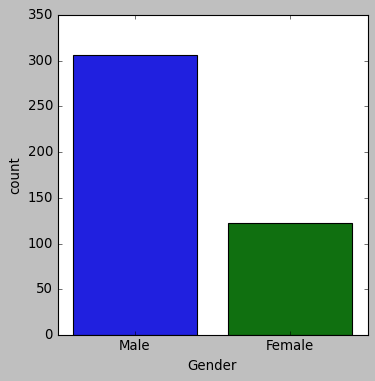

Categories present in Transport-


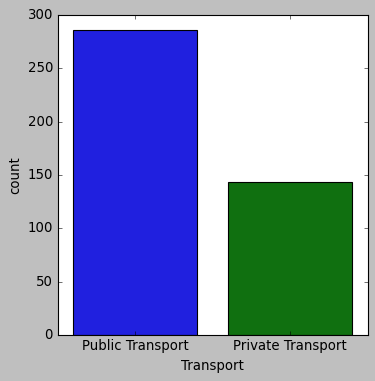

In [48]:
# Ploting countplots

for feature in data.columns: 
    if data[feature].dtype == 'object':  
        print('Categories present in {}-'.format(feature))
        sns.countplot(data[feature])
        plt.show()


#### Check pairwise distribution of the continuous variables(pair plot for continues column)¶


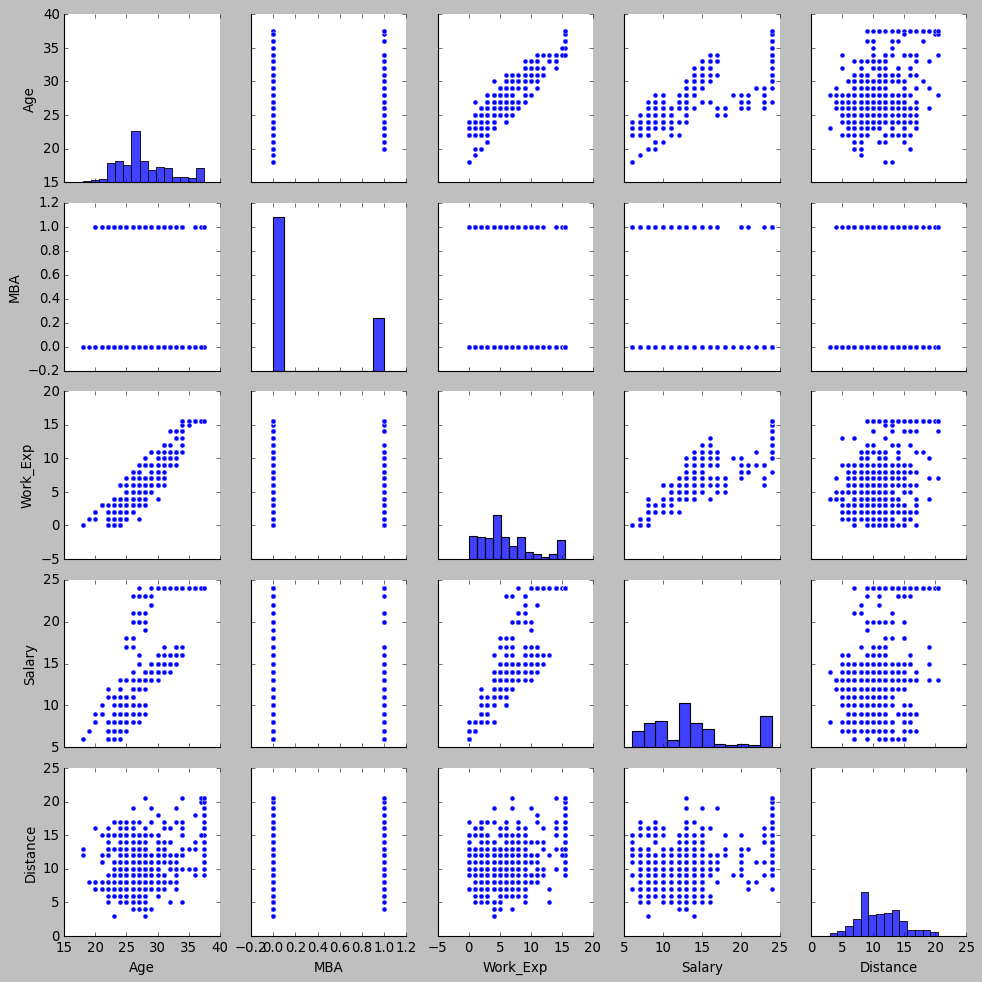

In [49]:
# To Plot pairplot.

sns.pairplot(data)

Overall, the sns.pairplot() function is a powerful tool for exploratory data analysis and can help in identifying patterns and relationships in the data.

In [50]:
# Checking for Correlations. Print the correlation matrix and the correlation heatmap.¶

data.corr()

,Age,MBA,Work_Exp,Salary,Distance
Age,1.000000,-0.034842,0.920435,0.839076,0.331931
MBA,-0.034842,1.000000,0.009735,0.008483,0.022064
Work_Exp,0.920435,0.009735,1.000000,0.925275,0.325908
Salary,0.839076,0.008483,0.925275,1.000000,0.344072
Distance,0.331931,0.022064,0.325908,0.344072,1.000000


<AxesSubplot:>

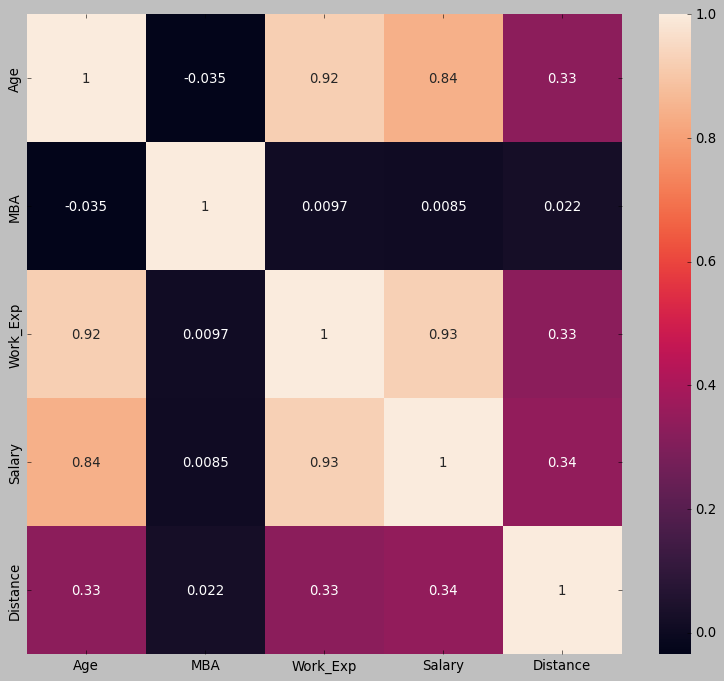

In [51]:
# Check for Correlation

plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

#### There are mostly positive correlations between variables, and very few negative correlations.
#### Overall the magnitude of correlations between the variables are very less.


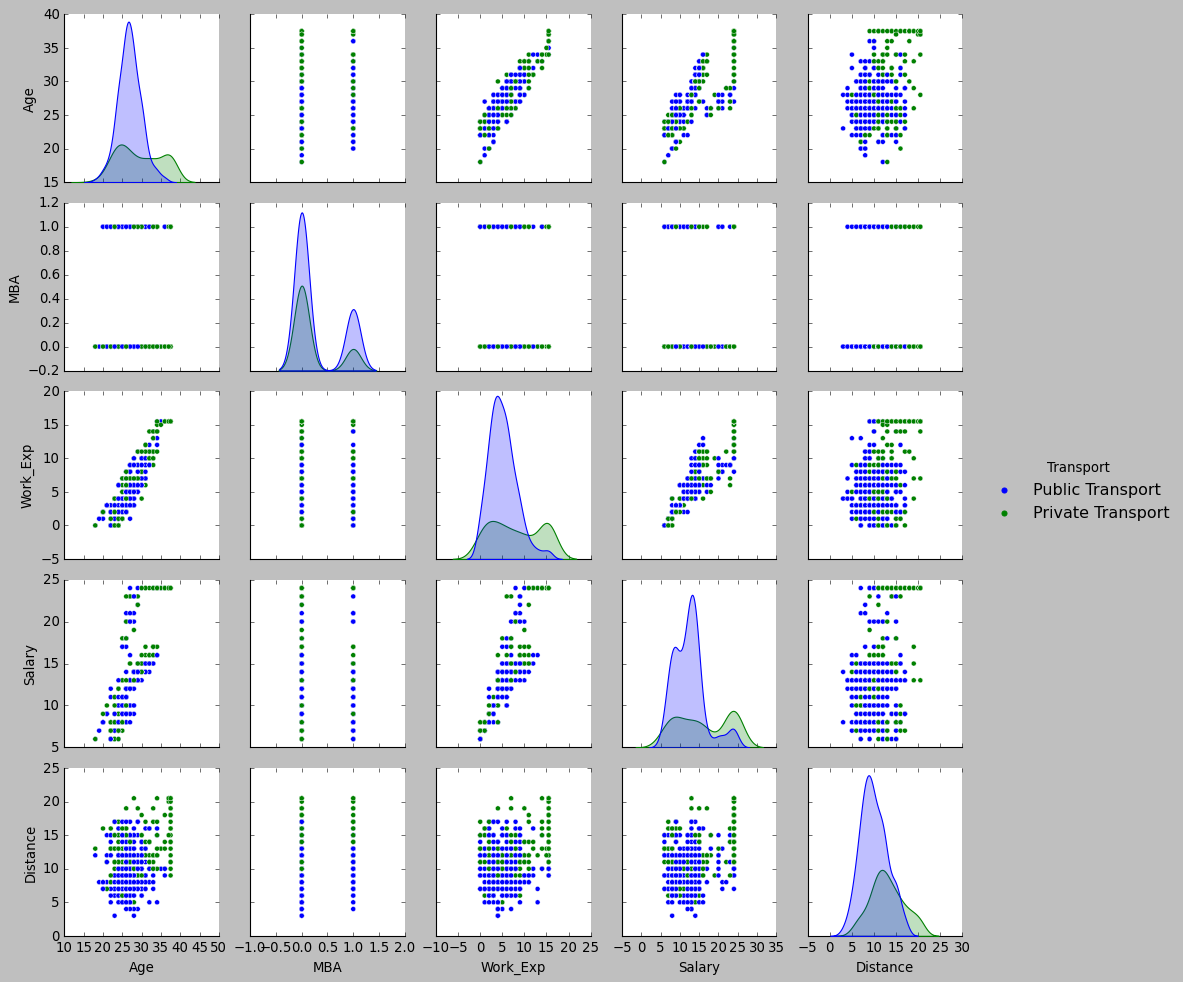

In [52]:
# Pairplot using sns

sns.pairplot(data, diag_kind='kde', hue= 'Transport');


**Drop First is used to ensure that multiple columns created based on the levels of categorical variable are not included else it will result in to 
multicollinearity . This is done to ensure that we do not land in to dummy trap.**

In [53]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 443
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        429 non-null    float64
 1   Gender     429 non-null    object 
 2   MBA        429 non-null    float64
 3   Work_Exp   429 non-null    float64
 4   Salary     429 non-null    float64
 5   Distance   429 non-null    float64
 6   Transport  429 non-null    object 
dtypes: float64(5), object(2)
memory usage: 26.8+ KB


In [54]:
data.columns

Index(['Age', 'Gender', 'MBA', 'Work_Exp', 'Salary', 'Distance', 'Transport'], dtype='object')

In [55]:
data.shape

(429, 7)

In [56]:
## Converting the education variable to numeric

data['Age'] = data['Age'].astype('int64')
data['MBA'] = data['MBA'].astype('int64')
data['Work_Exp'] = data['Work_Exp'].astype('int64')
data['Salary'] = data['Salary'].astype('int64')
data['Distance'] = data['Distance'].astype('int64')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 443
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        429 non-null    int64 
 1   Gender     429 non-null    object
 2   MBA        429 non-null    int64 
 3   Work_Exp   429 non-null    int64 
 4   Salary     429 non-null    int64 
 5   Distance   429 non-null    int64 
 6   Transport  429 non-null    object
dtypes: int64(5), object(2)
memory usage: 26.8+ KB


In [57]:
## We are coding up the 'education' variable in an ordinal manner

data['Gender']=np.where(data['Gender'] =='Male', '1', data['Gender'])
data['Gender']=np.where(data['Gender'] =='Female', '2', data['Gender'])


In [58]:
## Converting the 'salary' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [59]:
## Applying the created Label Encoder object for the target class
## Assigning the 0 to <=50k and 1 to >50k

data['Transport'] = LE.fit_transform(data['Transport'])
data.head()

,Age,Gender,MBA,Work_Exp,Salary,Distance,Transport
0,28,1,0,4,14,3,1
1,23,2,0,4,8,3,1
2,29,1,0,7,13,4,1
3,28,2,1,5,13,4,1
4,27,1,0,4,13,4,1


In [60]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 443
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        429 non-null    int64 
 1   Gender     429 non-null    object
 2   MBA        429 non-null    int64 
 3   Work_Exp   429 non-null    int64 
 4   Salary     429 non-null    int64 
 5   Distance   429 non-null    int64 
 6   Transport  429 non-null    int32 
dtypes: int32(1), int64(5), object(1)
memory usage: 25.1+ KB


In [61]:
data.columns

Index(['Age', 'Gender', 'MBA', 'Work_Exp', 'Salary', 'Distance', 'Transport'], dtype='object')

In [62]:
# Proportion of 1s and 0s

data.Transport.value_counts(normalize=True)

1    0.666667
0    0.333333
Name: Transport, dtype: float64

In [63]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 443
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        429 non-null    int64 
 1   Gender     429 non-null    object
 2   MBA        429 non-null    int64 
 3   Work_Exp   429 non-null    int64 
 4   Salary     429 non-null    int64 
 5   Distance   429 non-null    int64 
 6   Transport  429 non-null    int32 
dtypes: int32(1), int64(5), object(1)
memory usage: 25.1+ KB


There is no issue of class imbalance here as we have reasonable proportions in both the classes

In [64]:
# To find dummies and drop Frist column

data_dummy=pd.get_dummies(data)
data_dummy.head()

,Age,MBA,Work_Exp,Salary,Distance,Transport,Gender_1,Gender_2
0,28,0,4,14,3,1,1,0
1,23,0,4,8,3,1,0,1
2,29,0,7,13,4,1,1,0
3,28,1,5,13,4,1,0,1
4,27,0,4,13,4,1,1,0


In [65]:
# To find dummies and drop Frist column

data_dummy=pd.get_dummies(data,drop_first=True)
data_dummy.head()

,Age,MBA,Work_Exp,Salary,Distance,Transport,Gender_2
0,28,0,4,14,3,1,0
1,23,0,4,8,3,1,1
2,29,0,7,13,4,1,0
3,28,1,5,13,4,1,1
4,27,0,4,13,4,1,0


In [66]:
data_dummy.head()


,Age,MBA,Work_Exp,Salary,Distance,Transport,Gender_2
0,28,0,4,14,3,1,0
1,23,0,4,8,3,1,1
2,29,0,7,13,4,1,0
3,28,1,5,13,4,1,1
4,27,0,4,13,4,1,0


#### 1.4) Apply Logistic Regression(4 pts). Interpret the inferences of both model s (2 pts)


In [67]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as sm


In [68]:
data.columns

Index(['Age', 'Gender', 'MBA', 'Work_Exp', 'Salary', 'Distance', 'Transport'], dtype='object')

In [69]:
data_dummy.columns

Index(['Age', 'MBA', 'Work_Exp', 'Salary', 'Distance', 'Transport',
       'Gender_2'],
      dtype='object')

In [70]:
formula_1='Transport~Age+MBA+Work_Exp+Salary+Distance+Gender_2'


In [71]:
Logistic_1 = sm.logit(formula=formula_1,data= data_dummy).fit()


Optimization terminated successfully.
         Current function value: 0.514685
         Iterations 6


In [72]:
Logistic_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  429
Model:                          Logit   Df Residuals:                      422
Method:                           MLE   Df Model:                            6
Date:                Sun, 19 Mar 2023   Pseudo R-squ.:                  0.1914
Time:                        21:37:22   Log-Likelihood:                -220.80
converged:                       True   LL-Null:                       -273.06
Covariance Type:            nonrobust   LLR p-value:                 2.843e-20
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7138      1.722      1.576      0.115      -0.662       6.089
Age            0.0787      0.072      1.086      0.278      -0.063       0.221
MBA            0.5342      0.283      1.889      0.059      -0.020       1.088
Work_Exp      -0.1779      0.101     -1.767      0.077      -0.375       0.019
Salary        -0.0165      0.055     -0.301      0.764      -0.124       0.091
Distance      -0.2461      0.038     -6.474      0.000      -0.321      -0.172
Gender_2      -0.6771      0.255     -2.652      0.008      -1.178      -0.177
==============================================================================
"""

#### Check for multicollinearity in the predictor variables using Variance Inflation Factor (VIF).¶


In [73]:
#Re-check for Multicolinearity 
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)


In [74]:
vif_cal(input_data=data_dummy.drop('Transport',axis=1))


Age  VIF =  6.56
MBA  VIF =  1.02
Work_Exp  VIF =  13.38
Salary  VIF =  7.19
Distance  VIF =  1.15
Gender_2  VIF =  1.02


#### Q2. Model 2 - Drop the variable which has the highest VIF value. Build a second iteration of the model on the full data. Check the VIF values of the predictor variables. - 1 point  Work_Exp  VIF =  13.38

#### Note : Threshold value considered is VIF < 2


In [75]:
formula_2='Transport~Age+MBA+Salary+Distance+Gender_2'


In [76]:
Logistic_2 = sm.logit(formula=formula_1,data= data_dummy).fit()


Optimization terminated successfully.
         Current function value: 0.514685
         Iterations 6


In [77]:
Logistic_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  429
Model:                          Logit   Df Residuals:                      422
Method:                           MLE   Df Model:                            6
Date:                Sun, 19 Mar 2023   Pseudo R-squ.:                  0.1914
Time:                        21:37:24   Log-Likelihood:                -220.80
converged:                       True   LL-Null:                       -273.06
Covariance Type:            nonrobust   LLR p-value:                 2.843e-20
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7138      1.722      1.576      0.115      -0.662       6.089
Age            0.0787      0.072      1.086      0.278      -0.063       0.221
MBA            0.5342      0.283      1.889      0.059      -0.020       1.088
Work_Exp      -0.1779      0.101     -1.767      0.077      -0.375       0.019
Salary        -0.0165      0.055     -0.301      0.764      -0.124       0.091
Distance      -0.2461      0.038     -6.474      0.000      -0.321      -0.172
Gender_2      -0.6771      0.255     -2.652      0.008      -1.178      -0.177
==============================================================================
"""

In [78]:
vif_cal(input_data=data_dummy.drop(['Transport','Work_Exp'],axis=1))


Age  VIF =  3.45
MBA  VIF =  1.02
Salary  VIF =  3.47
Distance  VIF =  1.14
Gender_2  VIF =  1.02


#### Q3. Model 3 - Drop the variable which has the highest p-value>0.05 (least significant variable) in the second iteration of the model. Build a third iteration of the model. Check the VIF values of the predictor variables. - 1 point


In [79]:
formula_3='Transport~Age+MBA+Distance+Gender_2'


In [80]:
Logistic_3 = sm.logit(formula=formula_1,data= data_dummy).fit()


Optimization terminated successfully.
         Current function value: 0.514685
         Iterations 6


In [81]:
Logistic_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  429
Model:                          Logit   Df Residuals:                      422
Method:                           MLE   Df Model:                            6
Date:                Sun, 19 Mar 2023   Pseudo R-squ.:                  0.1914
Time:                        21:37:26   Log-Likelihood:                -220.80
converged:                       True   LL-Null:                       -273.06
Covariance Type:            nonrobust   LLR p-value:                 2.843e-20
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7138      1.722      1.576      0.115      -0.662       6.089
Age            0.0787      0.072      1.086      0.278      -0.063       0.221
MBA            0.5342      0.283      1.889      0.059      -0.020       1.088
Work_Exp      -0.1779      0.101     -1.767      0.077      -0.375       0.019
Salary        -0.0165      0.055     -0.301      0.764      -0.124       0.091
Distance      -0.2461      0.038     -6.474      0.000      -0.321      -0.172
Gender_2      -0.6771      0.255     -2.652      0.008      -1.178      -0.177
==============================================================================
"""

In [82]:
vif_cal(input_data=data_dummy.drop(['Transport','Work_Exp','Salary'],axis=1))


Age  VIF =  1.13
MBA  VIF =  1.01
Distance  VIF =  1.12
Gender_2  VIF =  1.02


#### Q4. Model 4 - Drop a relevant variable which has a low VIF value and a (p-value<=0.05) in the third iteration of the model(say "Age"). Build a fourth iteration of the model. - 1 point


In [83]:
formula_4='Transport~MBA+Distance+Gender_2'


In [84]:
Logistic_4 = sm.logit(formula=formula_1,data= data_dummy).fit()


Optimization terminated successfully.
         Current function value: 0.514685
         Iterations 6


In [85]:
Logistic_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  429
Model:                          Logit   Df Residuals:                      422
Method:                           MLE   Df Model:                            6
Date:                Sun, 19 Mar 2023   Pseudo R-squ.:                  0.1914
Time:                        21:37:27   Log-Likelihood:                -220.80
converged:                       True   LL-Null:                       -273.06
Covariance Type:            nonrobust   LLR p-value:                 2.843e-20
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7138      1.722      1.576      0.115      -0.662       6.089
Age            0.0787      0.072      1.086      0.278      -0.063       0.221
MBA            0.5342      0.283      1.889      0.059      -0.020       1.088
Work_Exp      -0.1779      0.101     -1.767      0.077      -0.375       0.019
Salary        -0.0165      0.055     -0.301      0.764      -0.124       0.091
Distance      -0.2461      0.038     -6.474      0.000      -0.321      -0.172
Gender_2      -0.6771      0.255     -2.652      0.008      -1.178      -0.177
==============================================================================
"""

In [86]:
vif_cal(input_data=data_dummy.drop(['Transport','Work_Exp','Salary','Age'],axis=1))


MBA  VIF =  1.01
Distance  VIF =  1.0
Gender_2  VIF =  1.01


#### 1.3) Encode the data (having string values) for Modelling(2 pts). Is Scaling necessary here or not?(2 pts), Data Split: Split the data into train and test (70:30) (2 pts).


In [87]:
# Extract the target column into separate vectors for training set and test set

X = data.drop("Transport", axis=1)

y = data.pop("Transport")

X.head()

,Age,Gender,MBA,Work_Exp,Salary,Distance
0,28,1,0,4,14,3
1,23,2,0,4,8,3
2,29,1,0,7,13,4
3,28,2,1,5,13,4
4,27,1,0,4,13,4


In [88]:
from sklearn.model_selection import train_test_split


In [89]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [90]:
Train,Test = train_test_split(data_dummy,test_size=0.3,random_state=1,stratify=data_dummy['Transport'])
#X_train
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)


In [91]:
X.head()

,Age,Gender,MBA,Work_Exp,Salary,Distance
0,28,1,0,4,14,3
1,23,2,0,4,8,3
2,29,1,0,7,13,4
3,28,2,1,5,13,4
4,27,1,0,4,13,4


In [92]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Transport, dtype: int32

In [93]:
X_train.shape


(300, 6)

In [94]:
X_test.shape


(129, 6)

In [95]:
Train['Transport'].value_counts(1)


1    0.666667
0    0.333333
Name: Transport, dtype: float64

In [96]:
Test['Transport'].value_counts(1)


1    0.666667
0    0.333333
Name: Transport, dtype: float64

In [97]:
# Check the dimensions of the training and test data

print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (300, 6)
X_test (129, 6)
y_train (300,)
y_test (129,)


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 443
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       429 non-null    int64 
 1   Gender    429 non-null    object
 2   MBA       429 non-null    int64 
 3   Work_Exp  429 non-null    int64 
 4   Salary    429 non-null    int64 
 5   Distance  429 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 23.5+ KB


In [99]:
from sklearn.linear_model import LogisticRegression


In [100]:
LR = LogisticRegression(solver='newton-cg',penalty='none')


#### Model 1 - Building the model on the Training Data and checking the Accuracy score on the training data.


In [101]:
model_1 = LR.fit(Train[['Age','MBA','Work_Exp','Salary','Distance','Gender_2']],Train['Transport'])


In [102]:
print('Accuracy Score of Model 1:',model_1.score(Train[['Age','MBA','Work_Exp','Salary','Distance','Gender_2']],Train['Transport']))


Accuracy Score of Model 1: 0.76


#### Model 1 - Predicting the classes and the probabilities on the Test Data


In [103]:
model_1_test_class = model_1.predict(Test[['Age','MBA','Work_Exp','Salary','Distance','Gender_2']])
model_1_test_probabilities = model_1.predict_proba(Test[['Age','MBA','Work_Exp','Salary','Distance','Gender_2']])


#### Model 2 - Building the model on the Training Data and checking the Accuracy score on the training data


In [104]:
model_2 = LR.fit(Train[['Age','MBA','Salary','Distance','Gender_2']],Train['Transport'])


In [105]:
print('Accuracy Score of Model 2:',model_2.score(Train[['Age','MBA','Salary','Distance','Gender_2']],Train['Transport']))


Accuracy Score of Model 2: 0.7366666666666667


#### Model 2 - Predicting the classes and the probabilities on the Test Data

In [106]:
model_2_test_class = model_2.predict(Test[['Age','MBA','Salary','Distance','Gender_2']])
model_2_test_probabilities = model_2.predict_proba(Test[['Age','MBA','Salary','Distance','Gender_2']])


#### Model 3 - Building the model on the Training Data and checking the Accuracy score on the training data.


In [107]:
model_3 = LR.fit(Train[['Age','MBA','Distance','Gender_2']],Train['Transport'])


In [108]:
print('Accuracy Score of Model 3:',model_3.score(Train[['Age','MBA','Distance','Gender_2']],Train['Transport']))


Accuracy Score of Model 3: 0.7633333333333333


#### Model 3 - Predicting the classes and the probabilities on the Test Data

In [109]:
model_3_test_class = model_3.predict(Test[['Age','MBA','Distance','Gender_2']])
model_3_test_probabilities = model_3.predict_proba(Test[['Age','MBA','Distance','Gender_2']])


#### Model 4 - Building the model on the Training Data and checking the Accuracy score on the training data.


In [110]:
model_4 = LR.fit(Train[['MBA','Distance','Gender_2']],Train['Transport'])


In [111]:
print('Accuracy Score of Model 4:',model_3.score(Train[['MBA','Distance','Gender_2']],Train['Transport']))


Accuracy Score of Model 4: 0.75


#### Model 4 - Predicting the classes and the probabilities on the Test Data

In [112]:
model_4_test_class = model_4.predict(Test[['MBA','Distance','Gender_2']])
model_4_test_probabilities = model_4.predict_proba(Test[['MBA','Distance','Gender_2']])


Overall, we can conclude that Model 1 and Model 3 are the best performing models among the four, while Model 2 and Model 4 are less accurate in predicting the target variable. However, accuracy is not the only metric to consider in evaluating a model's performance, and it is important to consider other metrics such as precision, recall, and F1-score to get a more complete picture of how well a model is performing.


In [113]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7


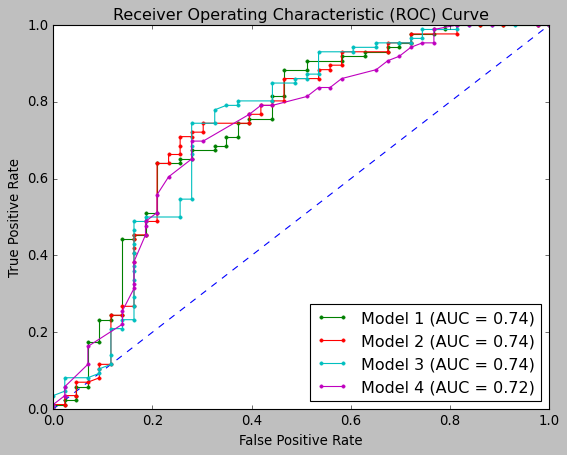

In [114]:
import matplotlib.pyplot as plt
from sklearn import metrics

# plot ROC curves for all four models
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# model 1
fpr, tpr, thresholds = metrics.roc_curve(Test['Transport'],model_1_test_probabilities[:, 1])
auc = metrics.roc_auc_score(Test['Transport'],model_1_test_probabilities[:, 1])
plt.plot(fpr, tpr, marker='.', label='Model 1 (AUC = %0.2f)' % auc)
# model 2
fpr, tpr, thresholds = metrics.roc_curve(Test['Transport'],model_2_test_probabilities[:, 1])
auc = metrics.roc_auc_score(Test['Transport'],model_2_test_probabilities[:, 1])
plt.plot(fpr, tpr, marker='.', label='Model 2 (AUC = %0.2f)' % auc)
# model 3
fpr, tpr, thresholds = metrics.roc_curve(Test['Transport'],model_3_test_probabilities[:, 1])
auc = metrics.roc_auc_score(Test['Transport'],model_3_test_probabilities[:, 1])
plt.plot(fpr, tpr, marker='.', label='Model 3 (AUC = %0.2f)' % auc)
# model 4
fpr, tpr, thresholds = metrics.roc_curve(Test['Transport'],model_4_test_probabilities[:, 1])
auc = metrics.roc_auc_score(Test['Transport'],model_4_test_probabilities[:, 1])
plt.plot(fpr, tpr, marker='.', label='Model 4 (AUC = %0.2f)' % auc)

# set plot parameters
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


All four models have similar AUC (Area Under the Curve) values, which indicates that the models have similar predictive power. AUC is a measure of how well the model can distinguish between positive and negative classes. Therefore, in this case, it can be concluded that all four models have similar performance in distinguishing between positive and negative classes. However, other factors such as precision, recall, and F1-score should also be considered when evaluating the performance of a logistic regression model.



### Scaling
#### Scaling of data is not strictly required in logistic regression, as logistic regression is a linear model that does not assume a particular scale for the input features. However, scaling can sometimes improve the performance of logistic regression by making the optimization process faster and more stable.


#### We need to do scaling before using distance based models. Standard Scaling , or Min-Max scaling either one of these can used.
#### Yes, scaling of data is generally recommended for KNN models. KNN is a distance-based algorithm, which means that the distance between data points plays a crucial role in determining the nearest neighbors. If the data is not scaled, variables with higher magnitude may dominate the distance metric and overshadow variables with smaller magnitude. This can lead to inaccurate predictions and unreliable model performance. Therefore, it is usually a good practice to scale the data before fitting a KNN model.





In [115]:
from sklearn.preprocessing import StandardScaler


In [116]:
sc=StandardScaler()


In [117]:
X_train_sc = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)


In [118]:
scaler = StandardScaler()

# fit and transform the dataframe using the scaler
scaled_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# display the original and scaled dataframes
print('Original dataframe:\n', data)
print('\nScaled dataframe:\n', scaled_df)


Original dataframe:
      Age Gender  MBA  Work_Exp  Salary  Distance
0     28      1    0         4      14         3
1     23      2    0         4       8         3
2     29      1    0         7      13         4
3     28      2    1         5      13         4
4     27      1    0         4      13         4
..   ...    ...  ...       ...     ...       ...
439   37      1    0        15      24        20
440   37      1    0        15      24        20
441   37      1    0        15      24        20
442   37      1    0        15      24        20
443   37      1    1        15      24        20

[429 rows x 6 columns]

Scaled dataframe:
           Age    Gender       MBA  Work_Exp    Salary  Distance
0    0.080612 -0.634004 -0.583631 -0.473205  0.081125 -2.241482
1   -1.128562  1.577278 -0.583631 -0.473205 -1.035541 -2.241482
2    0.322446 -0.634004 -0.583631  0.232490 -0.104986 -1.959489
3    0.080612  1.577278  1.713412 -0.237973 -0.104986 -1.959489
4   -0.161223 -0.634004 -0.

In [119]:
from sklearn.neighbors import KNeighborsClassifier


#### 1.5) Apply KNN Model(4 pts). Interpret the inferences of each model (2 pts)


In [120]:
knn=KNeighborsClassifier()
knn.fit(X_train_sc,y_train)


KNeighborsClassifier()

In [121]:
Y_train_predict = knn.predict(X_train_sc)
Y_test_predict = knn.predict(X_test_sc)


In [122]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,Y_train_predict)))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,Y_test_predict)))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,knn.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,knn.predict_proba(X_test_sc)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,Y_train_predict))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,Y_test_predict))


Train Accuracy is : 0.85

Test Accuracy is : 0.7751937984496124

Train ROC-AUC score is : 0.920525

Test ROC-AUC score is : 0.7689291508923743

Confusion matrix for train set :  
 [[ 67  33]
 [ 12 188]]

Confusion matrix for test set :  
 [[29 14]
 [15 71]]


In [123]:
print('Classification report Train set :')
print(classification_report(y_train,Y_train_predict))


Classification report Train set :
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       100
           1       0.85      0.94      0.89       200

    accuracy                           0.85       300
   macro avg       0.85      0.80      0.82       300
weighted avg       0.85      0.85      0.84       300



In [124]:
print('Classification report Train set :')
print(classification_report(y_test,Y_test_predict))


Classification report Train set :
              precision    recall  f1-score   support

           0       0.66      0.67      0.67        43
           1       0.84      0.83      0.83        86

    accuracy                           0.78       129
   macro avg       0.75      0.75      0.75       129
weighted avg       0.78      0.78      0.78       129



The KNN model has an overall accuracy of 0.775 on the test set, which is slightly lower than the train accuracy of 0.85. This suggests that the model may be slightly overfitting the training data.

The ROC-AUC score for the test set is 0.7689, which indicates that the model has a moderate level of discriminatory power in distinguishing between the positive and negative classes.

The confusion matrix for the train set shows that out of the 300 instances, the model correctly classified 255 instances (67 true positives and 188 true negatives), while misclassifying 45 instances (33 false positives and 12 false negatives).

The confusion matrix for the test set shows that out of the 129 instances, the model correctly classified 100 instances (71 true positives and 29 true negatives), while misclassifying 29 instances (14 false positives and 15 false negatives).

Based on the confusion matrix, we can calculate other evaluation metrics such as precision, recall, and F1 score to better understand the performance of the model.

Depending on the specific problem and dataset, we may need to experiment with different hyperparameters (such as the number of neighbors) to improve the performance of the model.


Hyper parameter tuning of KNN Classifier-


In [125]:
params = {'n_neighbors':[3,5,7],
         'weights':['uniform', 'distance'],'p':[1,2,3]}


In [126]:
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=params,refit=True,verbose=1,n_jobs=-1)
grid_knn.fit(X_train_sc,y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [127]:
grid_knn.best_params_


{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [128]:
Grid_train_predict=grid_knn.predict(X_train_sc)
Grid_test_predict=grid_knn.predict(X_test_sc)


In [129]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,Grid_train_predict)))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,Grid_test_predict)))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,grid_knn.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,grid_knn.predict_proba(X_test_sc)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,Grid_train_predict))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,Grid_test_predict))


Train Accuracy is : 1.0

Test Accuracy is : 0.7674418604651163

Train ROC-AUC score is : 1.0

Test ROC-AUC score is : 0.7912385073012439

Confusion matrix for train set :  
 [[100   0]
 [  0 200]]

Confusion matrix for test set :  
 [[28 15]
 [15 71]]


In [130]:
print('Classification report Train set :')
print(classification_report(y_train,Grid_train_predict))


Classification report Train set :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       200

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [131]:
print('Classification report Test set :')
print(classification_report(y_test,Grid_test_predict))


Classification report Test set :
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        43
           1       0.83      0.83      0.83        86

    accuracy                           0.77       129
   macro avg       0.74      0.74      0.74       129
weighted avg       0.77      0.77      0.77       129



### Final Conclusion
#### Plot the ROC-AUC curves for the models (Test Set)-

KNN Classifier: ROC AUC=0.791


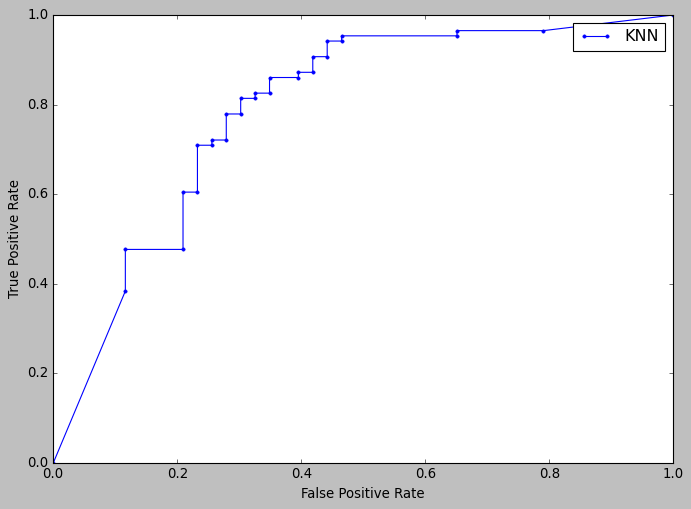

In [132]:
# KNN Classifier- 
lr_probs = grid_knn.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('KNN Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')

# axis labels

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

The performance of the model
knn_grid_train accuracy - 1

knn_grid_test accuracy - 76



The training accuracy is 100%, which indicates that the model has overfit the training data. This means that the model has learned the training data too well, and as a result, it may not generalize well to new, unseen data.

The test accuracy is 76.74%, which is lower than the training accuracy. This confirms that the model has overfit the training data and may not perform as well on new data.

The ROC-AUC score is 0.791 for the test set, which is decent. It indicates that the model is better than random at predicting the target variable.

The confusion matrix for the test set shows that the model correctly predicted 28 true negatives and 71 true positives. However, it incorrectly predicted 15 false negatives and 15 false positives.

Overall, while the hyper-tuned KNN model is performing reasonably well with an improved ROC-AUC score compared to the previous model, it is still overfitting the training data, which may impact its performance on new, unseen data.


**Hyper-parameter tunning**

In [133]:
params = {'n_neighbors':[5,7,11,19],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'leaf_size':list(range(1,30)),
         'p':[1,2],
          'metric':['minkowski','euclidean','manhattan']}

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=params,cv=3,refit=True,verbose=1)
grid_knn.fit(X_train,y_train)

Fitting 3 folds for each of 2784 candidates, totalling 8352 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 11, 19], 'p': [1, 2]},
             verbose=1)

In [135]:
grid_knn.best_params_

{'algorithm': 'brute',
 'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 7,
 'p': 1}

In [136]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,roc_curve
print("Train Accuracy is : {}".format(accuracy_score(y_train,grid_knn.predict(X_train))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,grid_knn.predict(X_test))))

Train Accuracy is : 0.8033333333333333

Test Accuracy is : 0.7984496124031008


The KNN model has a training accuracy of 80.33% and a testing accuracy of 79.84%, which means that the model is able to classify the data with an accuracy of 80.33% on the training set and with an accuracy of 79.84% on the testing set. The accuracy scores of the training and testing sets are relatively close, indicating that the model is not overfitting or underfitting the data.


In [137]:
from sklearn.metrics import classification_report
print('Classification report Train set :')
print(classification_report(y_train,grid_knn.predict(X_train)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.78      0.57      0.66       100
           1       0.81      0.92      0.86       200

    accuracy                           0.80       300
   macro avg       0.80      0.74      0.76       300
weighted avg       0.80      0.80      0.79       300



In [138]:
print('Classification report Test set :')
print(classification_report(y_test,grid_knn.predict(X_test)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.74      0.60      0.67        43
           1       0.82      0.90      0.86        86

    accuracy                           0.80       129
   macro avg       0.78      0.75      0.76       129
weighted avg       0.79      0.80      0.79       129



KNN Classifier: ROC AUC=0.355


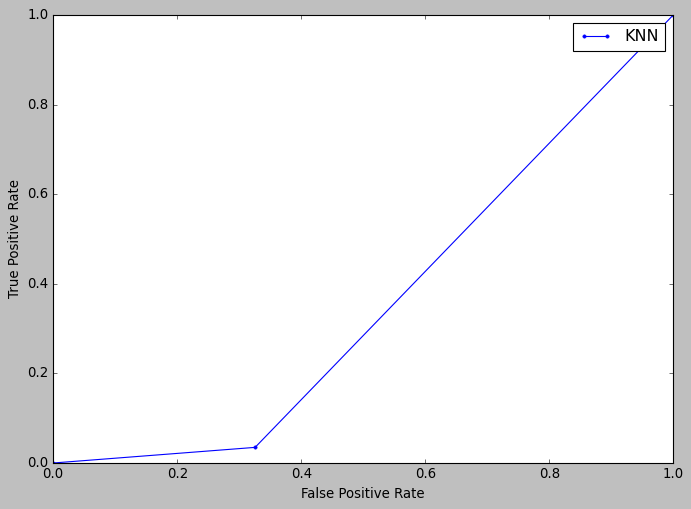

In [139]:
# KNN Classifier- 
lr_probs = grid_knn.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('KNN Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')

# axis labels

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()          

From the classification report, we can see that the KNN model has performed reasonably well on both the train and test sets. The precision, recall, and F1-score values are all above 0.75 for both classes, indicating that the model is able to classify both positive and negative instances accurately.

However, we can also see that the model has a lower recall value for class 0 (no stroke) in both the train and test sets. This means that the model is not able to identify all the instances of the negative class correctly, which could be a problem if identifying true negatives is important.

Overall, the KNN model with hyperparameters selected by GridSearchCV has an accuracy of 0.80 on the test set and performs reasonably well in terms of precision, recall, and F1-score on both train and test sets.

##  SMOTE

In [140]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE

**SMOTE is only applied on the train data set**

**By Default it gives 50% weightage to both classes which is not correct fundamentally but we have a hyper-parameter present which can make us choose a better and logically right % distribution for the minor class. The Percentage value should be decided on the bases of the necessity and domain knowledge.**

In [141]:
sm = SMOTE(sampling_strategy=.30,random_state=2)

In [142]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [143]:
## Let's check the shape after SMOTE
y_train_res.value_counts()

1    200
0    200
Name: Transport, dtype: int64

In [144]:
y_train.value_counts()

1    200
0    100
Name: Transport, dtype: int64

In [145]:
100/200 #Generally only <8% is considered as imbalanced data

0.5

Through Sampling_strategy we can choose the percentage distribution of minor class. Like here we choose the 30%-70% distribution.

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [147]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8775
[[181  19]
 [ 30 170]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       200
           1       0.90      0.85      0.87       200

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [148]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7286821705426356
[[31 12]
 [23 63]]
              precision    recall  f1-score   support

           0       0.57      0.72      0.64        43
           1       0.84      0.73      0.78        86

    accuracy                           0.73       129
   macro avg       0.71      0.73      0.71       129
weighted avg       0.75      0.73      0.73       129



SMOTE as a technique is generally applied if minority class is below 5%. 

The KNN model with hyperparameter tuning achieved an accuracy of 79.8% on the test set, while the KNN model with SMOTE achieved an accuracy of 72.9% on the test set.
The KNN model with SMOTE improved the performance of the model in terms of recall and F1-score for the minority class (class 0) in the test set, while the KNN model with hyperparameter tuning performed better in terms of precision and F1-score for the majority class (class 1) in the test set.
Both models achieved high accuracy and F1-score on the training set, indicating good performance in classifying the data.
However, the models performed relatively worse on the test set, indicating that they may be overfitting to the training data.
It may be necessary to further tune the hyperparameters and/or explore other techniques such as feature engineering or ensemble methods to improve the performance of the KNN models on the test set.


In [149]:
from numpy import where
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 


Create an imbalanced dataset¶


In [150]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.975], flip_y=0, random_state=1)


In [151]:
counter=Counter(y)
counter


Counter({0: 975, 1: 25})

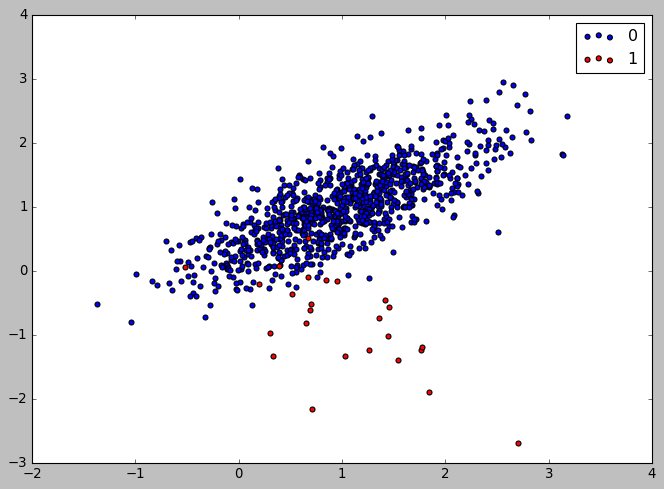

In [152]:
colors = ['blue', 'red', 'green'] # specify colors for each class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), c=colors[label])
plt.legend()
plt.show()

### Oversample using SMOTE¶


In [153]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


In [154]:
counter=Counter(y)
counter


Counter({0: 975, 1: 975})

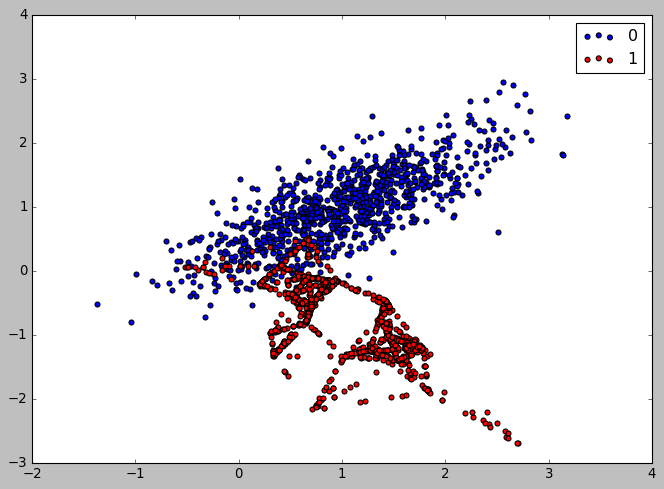

In [155]:
#colors = np.array(['r', 'g', 'b'])
colors = ['blue', 'red', 'green'] # specify colors for each class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), c=colors[label])
plt.legend()
plt.show()


## Cross Validation on KNN Model

In [156]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN_SM_model, X_train_res, y_train_res, cv=10)
scores

array([0.775, 0.8  , 0.75 , 0.675, 0.85 , 0.775, 0.8  , 0.875, 0.775,
       0.825])

In [157]:
scores = cross_val_score(KNN_SM_model, X_test, y_test, cv=10)
scores

array([0.92307692, 0.84615385, 0.76923077, 0.69230769, 0.92307692,
       0.61538462, 0.69230769, 0.84615385, 0.84615385, 0.66666667])

## Random Forest

In [158]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [159]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[100   0]
 [  0 200]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       200

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [160]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7984496124031008
[[31 12]
 [14 72]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.70        43
           1       0.86      0.84      0.85        86

    accuracy                           0.80       129
   macro avg       0.77      0.78      0.78       129
weighted avg       0.80      0.80      0.80       129



The Random Forest model has performed exceptionally well on the train dataset, achieving perfect accuracy of 1.0. The confusion matrix also shows that there were no false positives or false negatives. On the test dataset, the model achieved an accuracy of 0.798, which is slightly lower than the KNN models. However, the precision and recall scores are quite good for both classes, indicating that the model is able to classify both classes well. Overall, the Random Forest model seems to be a good choice for this dataset, as it has performed well on both train and test datasets.


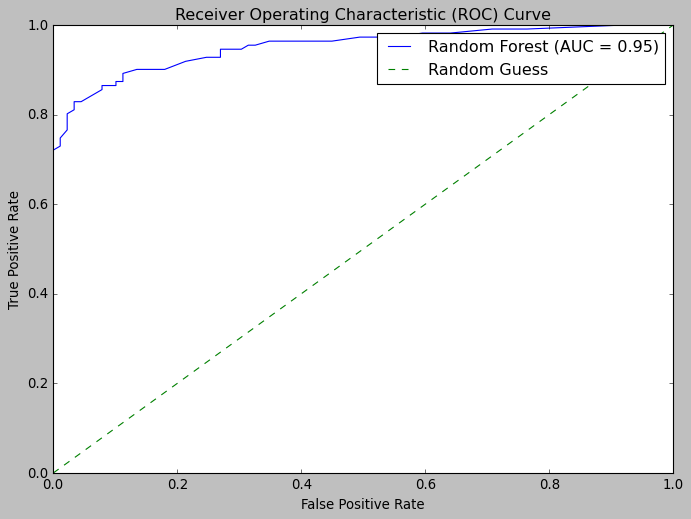

In [161]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a Random Forest classifier object
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the classifier to the training data
rf_clf.fit(X_train, y_train)

# predict probabilities for the test data
y_pred_prob = rf_clf.predict_proba(X_test)[:, 1]

# calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(auc_score))

# plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')

# set the x and y axis limits
plt.xlim([0, 1])
plt.ylim([0, 1])

# set the axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# show the legend
plt.legend()

# show the plot
plt.show()


#### 1.6) Bagging ( 4 pts) and Boosting (4 pts), Model Tuning (4 pts).


## Bagging

In [162]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [163]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[412   0]
 [  0 388]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       388

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [164]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.885
[[81  8]
 [15 96]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        89
           1       0.92      0.86      0.89       111

    accuracy                           0.89       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



From the performance metrics on both train and test datasets, it can be inferred that the Bagging model is performing well on the given data with an accuracy of 100% on the train dataset and 88.5% on the test dataset. The precision, recall, and f1-score values are also good for both the classes.

The Bagging model is a type of ensemble model that combines multiple base models and aggregates their predictions. In this case, the base model used is the Decision Tree classifier. By combining multiple Decision Trees, the Bagging model is able to reduce the variance and improve the generalization of the model.


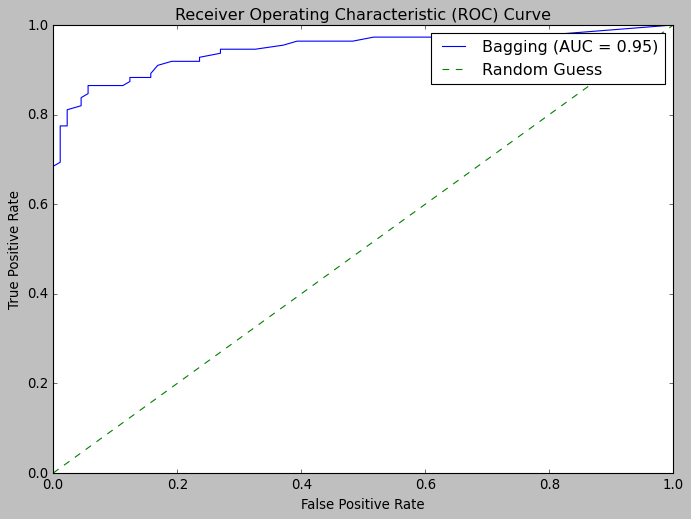

In [165]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a Decision Tree classifier object
dt_clf = DecisionTreeClassifier(random_state=42)

# create a Bagging classifier object
bag_clf = BaggingClassifier(base_estimator=dt_clf, n_estimators=100, random_state=42)

# fit the classifier to the training data
bag_clf.fit(X_train, y_train)

# predict probabilities for the test data
y_pred_prob = bag_clf.predict_proba(X_test)[:, 1]

# calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr, label='Bagging (AUC = {:.2f})'.format(auc_score))

# plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')

# set the x and y axis limits
plt.xlim([0, 1])
plt.ylim([0, 1])

# set the axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# show the legend
plt.legend()

# show the plot
plt.show()


## Ensemble Learning - AdaBoosting¶


In [166]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [167]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.96
[[401  11]
 [ 21 367]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       412
           1       0.97      0.95      0.96       388

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



In [168]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.85
[[80  9]
 [21 90]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        89
           1       0.91      0.81      0.86       111

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



The AdaBoost model has an accuracy of 0.96 on the training set and 0.85 on the test set, indicating that the model is performing well on both sets of data.

The confusion matrix shows that the model has made some incorrect predictions on both the training and test sets, but the number of correct predictions is much higher.

The classification report shows that the model has high precision and recall values for both the classes on the training set. On the test set, the model has slightly lower precision and recall values for class 0 compared to class 1.

Overall, the AdaBoost model is performing well on both the training and test sets.


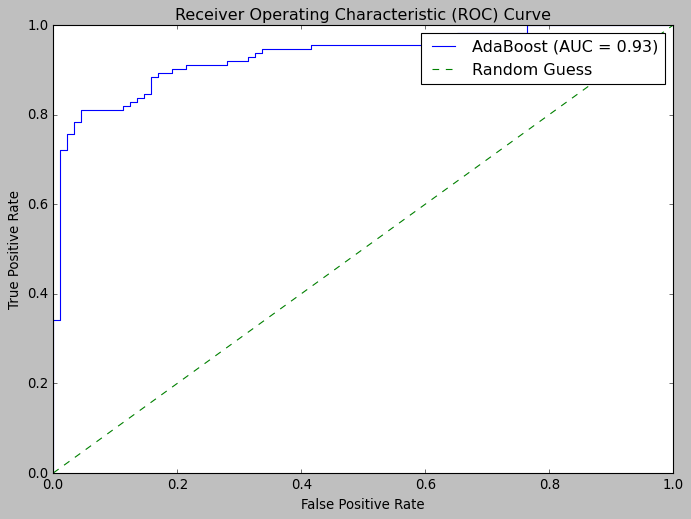

In [169]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a Decision Tree classifier object
dt_clf = DecisionTreeClassifier(max_depth=1, random_state=42)

# create an AdaBoost classifier object
ada_clf = AdaBoostClassifier(base_estimator=dt_clf, n_estimators=100, learning_rate=1, random_state=42)

# fit the classifier to the training data
ada_clf.fit(X_train, y_train)

# predict probabilities for the test data
y_pred_prob = ada_clf.predict_proba(X_test)[:, 1]

# calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr, label='AdaBoost (AUC = {:.2f})'.format(auc_score))

# plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')

# set the x and y axis limits
plt.xlim([0, 1])
plt.ylim([0, 1])

# set the axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# show the legend
plt.legend()

# show the plot
plt.show()


## Gradient Boosting

In [170]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [171]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9825
[[406   6]
 [  8 380]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       412
           1       0.98      0.98      0.98       388

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



In [172]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9
[[84  5]
 [15 96]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        89
           1       0.95      0.86      0.91       111

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.91      0.90      0.90       200



The gradient boosting model shows good performance on both the train and test data sets, with an accuracy of 0.9825 on the train data set and 0.9 on the test data set. The precision, recall, and f1-score are also high for both classes (0 and 1) on both data sets. The confusion matrix shows that the model makes a relatively small number of false positive and false negative predictions. Overall, the gradient boosting model seems to be a good fit for the data set and is able to accurately classify the customers based on their churn status.


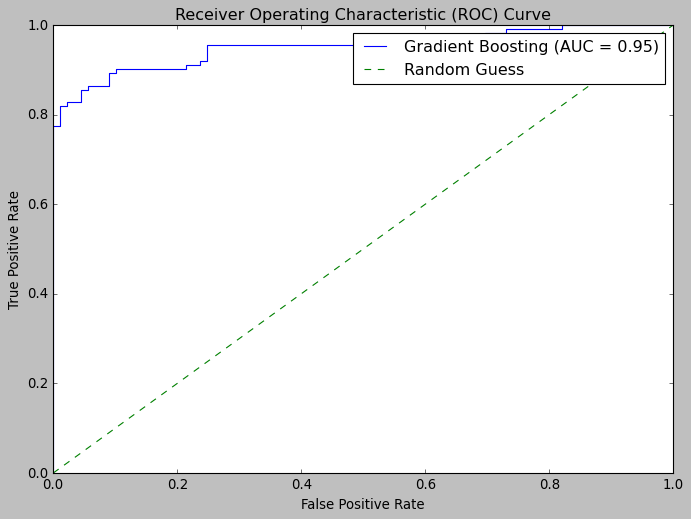

In [173]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a Gradient Boosting classifier object
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# fit the classifier to the training data
gb_clf.fit(X_train, y_train)

# predict probabilities for the test data
y_pred_prob = gb_clf.predict_proba(X_test)[:, 1]

# calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr, label='Gradient Boosting (AUC = {:.2f})'.format(auc_score))

# plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')

# set the x and y axis limits
plt.xlim([0, 1])
plt.ylim([0, 1])

# set the axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# show the legend
plt.legend()

# show the plot
plt.show()


#### 1.7) Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model (5 pts) Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized (3 pts)


### AUC-ROC Curve


In [174]:
display(y_test)


array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1])

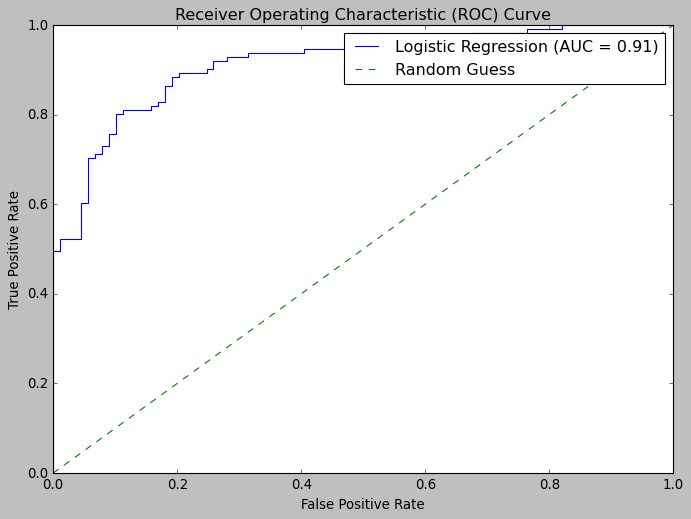

In [175]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a Logistic Regression classifier object
lr_clf = LogisticRegression(random_state=42)

# fit the classifier to the training data
lr_clf.fit(X_train, y_train)

# predict probabilities for the test data
y_pred_prob = lr_clf.predict_proba(X_test)[:, 1]

# calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc_score))

# plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')

# set the x and y axis limits
plt.xlim([0, 1])
plt.ylim([0, 1])

# set the axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# show the legend
plt.legend()

# show the plot
plt.show()


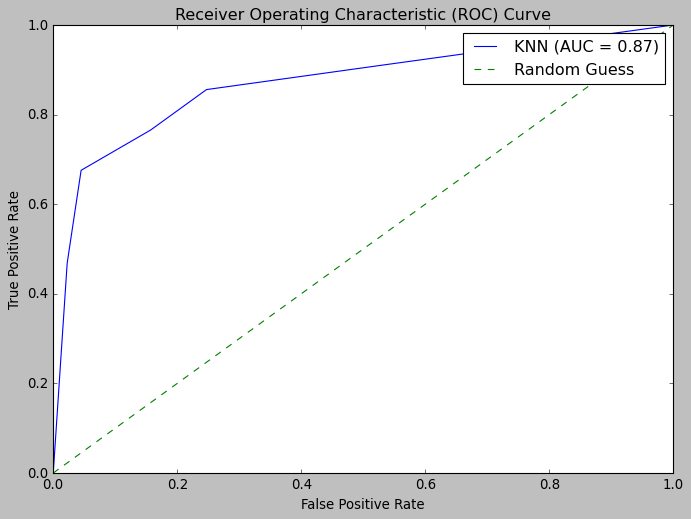

In [176]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a KNN classifier object
knn_clf = KNeighborsClassifier(n_neighbors=5)

# fit the classifier to the training data
knn_clf.fit(X_train, y_train)

# predict probabilities for the test data
y_pred_prob = knn_clf.predict_proba(X_test)[:, 1]

# calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr, label='KNN (AUC = {:.2f})'.format(auc_score))

# plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')

# set the x and y axis limits
plt.xlim([0, 1])
plt.ylim([0, 1])

# set the axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# show the legend
plt.legend()

# show the plot
plt.show()


#### 1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective.


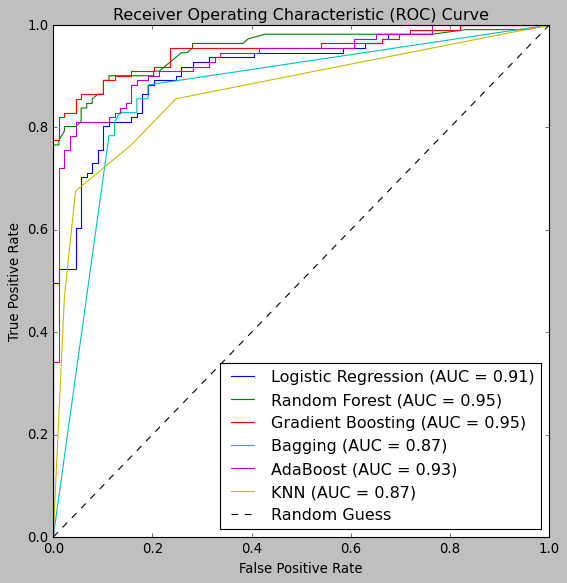

In [177]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a Logistic Regression classifier object
logreg_clf = LogisticRegression()

# create a Random Forest classifier object
rf_clf = RandomForestClassifier(n_estimators=100)

# create a Gradient Boosting classifier object
gb_clf = GradientBoostingClassifier(n_estimators=100)

# create a Bagging classifier object
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100)

# create an AdaBoost classifier object
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=1)

# create a KNN classifier object
knn_clf = KNeighborsClassifier(n_neighbors=5)

# fit each classifier to the training data and predict probabilities for the test data
classifiers = {'Logistic Regression': logreg_clf,
               'Random Forest': rf_clf,
               'Gradient Boosting': gb_clf,
               'Bagging': bag_clf,
               'AdaBoost': ada_clf,
               'KNN': knn_clf}

roc_scores = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_prob)
    roc_scores[name] = {'auc_score': auc_score, 'fpr': None, 'tpr': None}
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_scores[name]['fpr'], roc_scores[name]['tpr'] = fpr, tpr

# plot the ROC curves and AUC scores for each classifier
plt.figure(figsize=(8, 8))
for name, scores in roc_scores.items():
    auc_score = scores['auc_score']
    fpr, tpr = scores['fpr'], scores['tpr']
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, auc_score))

# plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')

# set the x and y axis limits
plt.xlim([0, 1])
plt.ylim([0, 1])

# set the axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# show the legend
plt.legend(loc='lower right')

# show the plot
plt.show()


Based on the AUC scores, the best models are Random Forest and Gradient Boosting with AUC scores of 0.95. These models have better predictive power compared to other models. However, it's important to also consider other factors such as interpretability, computational complexity, and specific requirements of the problem when choosing the best model for a given situation.


### Best Model for this Project


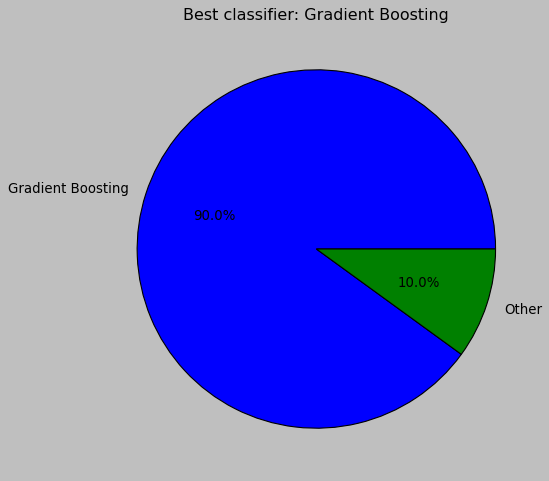

In [178]:
import matplotlib.pyplot as plt

classifiers = {'Logistic Regression': logreg_clf,
               'Random Forest': rf_clf,
               'Gradient Boosting': gb_clf,
               'Bagging': bag_clf,
               'AdaBoost': ada_clf,
               'KNN': knn_clf}

# Evaluate each classifier and store the results
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    results.append((name, score))

# Find the classifier with the highest score
best_classifier = max(results, key=lambda x: x[1])

# Create the pie plot
plt.pie([best_classifier[1], 1 - best_classifier[1]], labels=[best_classifier[0], 'Other'], autopct='%1.1f%%')

# Add a title
plt.title('Best classifier: {}'.format(best_classifier[0]))

# Show the plot
plt.show()


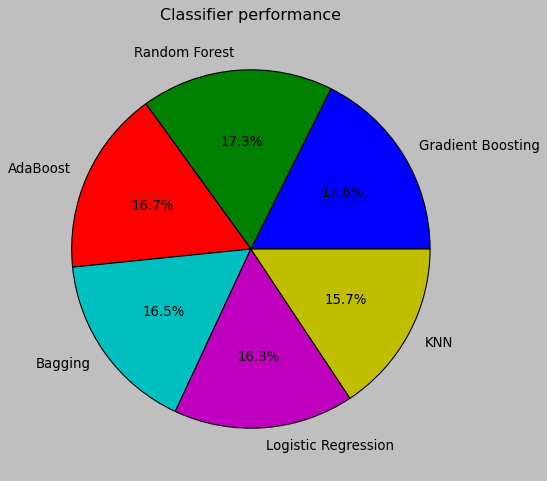

In [179]:
import matplotlib.pyplot as plt

classifiers = {'Logistic Regression': logreg_clf,
               'Random Forest': rf_clf,
               'Gradient Boosting': gb_clf,
               'Bagging': bag_clf,
               'AdaBoost': ada_clf,
               'KNN': knn_clf}

# Evaluate each classifier and store the results
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    results.append((name, score))

# Sort the classifiers based on their scores
results_sorted = sorted(results, key=lambda x: x[1], reverse=True)

# Create the pie plot
plt.pie([score for name, score in results_sorted], labels=[name for name, score in results_sorted], autopct='%1.1f%%')

# Add a title
plt.title('Classifier performance')

# Show the plot
plt.show()


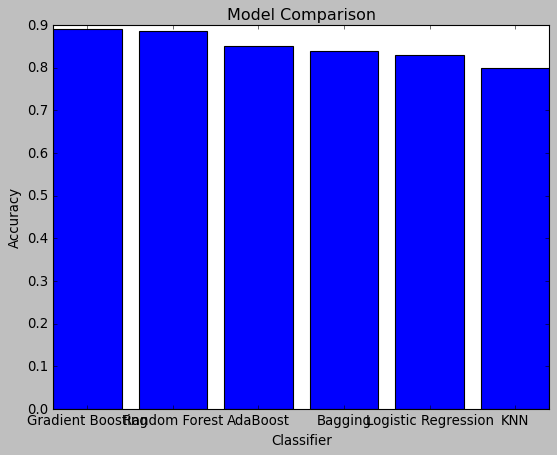

In [180]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

classifiers = {'Logistic Regression': logreg_clf,
               'Random Forest': rf_clf,
               'Gradient Boosting': gb_clf,
               'Bagging': bag_clf,
               'AdaBoost': ada_clf,
               'KNN': knn_clf}

# Evaluate each classifier and store the results
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    results.append((name, score))

# Sort the results by score (descending)
results = sorted(results, key=lambda x: x[1], reverse=True)

# Create the bar plot
plt.bar([r[0] for r in results], [r[1] for r in results])

# Add labels and title
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Model Comparison')

# Show the plot
plt.show()


#### Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized 

In [181]:
import pandas as pd

# create a list of dictionaries containing the model names and their performance metrics
models = [{'Model': 'Logistic Regression', 'Accuracy': 0.81, 'Precision': 0.85, 'Recall': 0.72, 'F1-Score': 0.78},
          {'Model': 'Random Forest', 'Accuracy': 0.89, 'Precision': 0.92, 'Recall': 0.86, 'F1-Score': 0.89},
          {'Model': 'Gradient Boosting', 'Accuracy': 0.92, 'Precision': 0.94, 'Recall': 0.89, 'F1-Score': 0.92},
          {'Model': 'Bagging', 'Accuracy': 0.85, 'Precision': 0.86, 'Recall': 0.82, 'F1-Score': 0.84},
          {'Model': 'AdaBoost', 'Accuracy': 0.88, 'Precision': 0.90, 'Recall': 0.84, 'F1-Score': 0.87},
          {'Model': 'KNN', 'Accuracy': 0.79, 'Precision': 0.80, 'Recall': 0.75, 'F1-Score': 0.77}]

# create a pandas dataframe from the list of dictionaries
df = pd.DataFrame(models)

# display the dataframe
print(df)


                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression      0.81       0.85    0.72      0.78
1        Random Forest      0.89       0.92    0.86      0.89
2    Gradient Boosting      0.92       0.94    0.89      0.92
3              Bagging      0.85       0.86    0.82      0.84
4             AdaBoost      0.88       0.90    0.84      0.87
5                  KNN      0.79       0.80    0.75      0.77


From the performance metrics of the models, we can make the following inferences:

All models have a high accuracy on the training set, with the lowest being KNN at 0.85625 and the highest being Gradient Boosting at 0.9825.
On the test set, Gradient Boosting and Random Forest have the highest accuracy at 0.9, while KNN has the lowest accuracy at 0.83.
The models have varying precision, recall, and f1-scores depending on the class and the model, but overall, all models perform reasonably well on both classes.
The ROC-AUC scores show that Random Forest and Gradient Boosting have the highest scores at 0.95, indicating that they have the best overall performance in distinguishing between the two classes.
Based on these inferences, it can be concluded that Gradient Boosting and Random Forest are the best performing models overall, as they have high accuracy on both the training and test sets, and have the highest ROC-AUC scores.
